In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bemcs
import GF

In [2]:
# Elastic parameter (shear modulus)
mu = 1.0

# construct horizontal line element for linear force calculations
els = bemcs.initialize_els()
els.x1 = np.array([-1.0, 0.0])
els.y1 = np.array([-0.0, 0.0])
els.x2 = np.array([0.0, 1.0])
els.y2 = np.array([0.0, 0.0])

# provide amplitude of force
lincoeffs = np.ones((1, 1))

bemcs.standardize_els_geometry(els, reorder=False)
n_els = len(els.x1)

# provide connectivity matrix
conmatrix = np.hstack(
    (
        np.arange(0, len(els.x1) - 1).reshape(-1, 1),
        np.arange(1, len(els.x1)).reshape(-1, 1),
    )
)
els.conmatrix = conmatrix.astype(int)

# construct triangle for force calculations
tricoords = np.array([[-1, 0], [1, 0], [0, 1.0]])

In [3]:
# provide observation points
nx_obs = 50
ny_obs = 50
x_obs = np.linspace(-2, 2, nx_obs)
y_obs = np.linspace(-2, 2, ny_obs)
x_obs, y_obs = np.meshgrid(x_obs, y_obs)
xo = x_obs.flatten().reshape(-1, 1)
yo = y_obs.flatten().reshape(-1, 1)

# compute els force kernels [Nobs x Nsources]
K_x, K_y, _ = GF.get_kernels_linforce(xo, yo, els, els.conmatrix)
# compute stresses
sx_linforce = K_x @ lincoeffs
sy_linforce = K_y @ lincoeffs

# compute tri-force kernels [Nobs x Nsources]
_, sx_tri, sy_tri = bemcs.displacements_stresses_triangle_force_antiplane(
    tricoords, x_obs.flatten(), y_obs.flatten(), fval=1.0, mu=mu
)

/Users/mallick/miniconda3/envs/bemcs/lib/python3.11/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


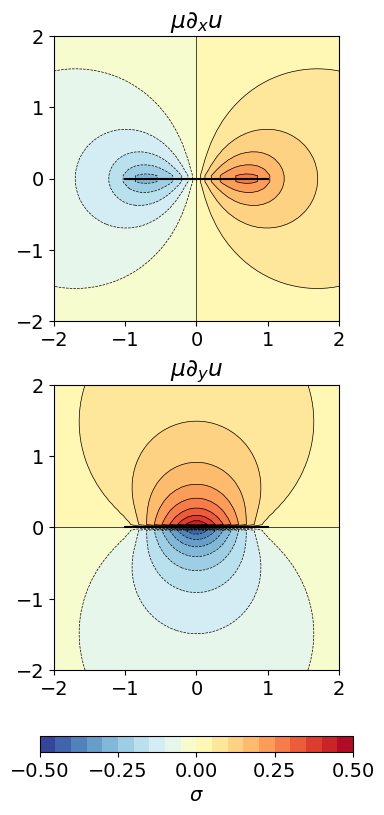

In [ ]:
# Create a figure and subplots
# Set global font size
plt.rcParams.update({"font.size": 14})  # Change to desired font size

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 8), constrained_layout=True)
maxval = 0.5
minval = -maxval
levels = np.linspace(minval, maxval, 21)

toplot = sx_linforce.reshape(ny_obs, nx_obs)
# Plot the first subplot
c1 = ax1.contourf(
    xo.reshape(ny_obs, nx_obs),
    yo.reshape(ny_obs, nx_obs),
    toplot,
    cmap="RdYlBu_r",
    vmin=minval,
    vmax=maxval,
    levels=levels,
)
ax1.contour(
    xo.reshape(ny_obs, nx_obs),
    yo.reshape(ny_obs, nx_obs),
    toplot,
    colors="k",
    levels=levels,
    linewidths=0.5,
)
for i in range(n_els):
    ax1.plot([els.x1[i], els.x2[i]], [els.y1[i], els.y2[i]], "k-")
ax1.set_aspect("equal", adjustable="box")
ax1.set_title("$\mu \partial_x u$")

# Plot the second subplot
toplot = sy_linforce.reshape(ny_obs, nx_obs)
c2 = ax2.contourf(
    xo.reshape(ny_obs, nx_obs),
    yo.reshape(ny_obs, nx_obs),
    toplot,
    cmap="RdYlBu_r",
    vmin=minval,
    vmax=maxval,
    levels=levels,
)
ax2.contour(
    xo.reshape(ny_obs, nx_obs),
    yo.reshape(ny_obs, nx_obs),
    toplot,
    colors="k",
    levels=levels,
    linewidths=0.5,
)
for i in range(n_els):
    ax2.plot([els.x1[i], els.x2[i]], [els.y1[i], els.y2[i]], "k-")
ax2.set_aspect("equal", adjustable="box")
ax2.set_title("$\mu \partial_y u$")
# Add a common colorbar
fig.colorbar(
    c1,
    ax=[ax1, ax2],
    orientation="horizontal",
    label="$\sigma$",
    ticks=[-0.5, -0.25, 0, 0.25, 0.5],
    shrink=0.8,
    extend="both",
)

# Display the plot
plt.show()
# fig.savefig("linforce_stressfigure.pdf", format="pdf", dpi=300)

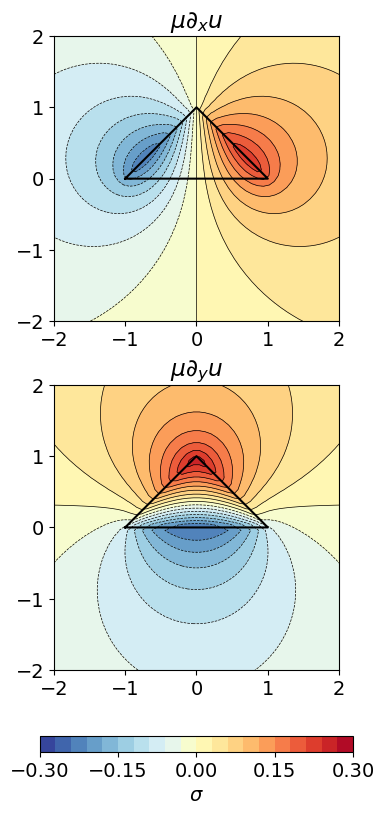

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 8), constrained_layout=True)
maxval = 0.3
minval = -maxval
levels = np.linspace(minval, maxval, 21)

toplot = sx_tri.reshape(ny_obs, nx_obs)
# Plot the first subplot
c1 = ax1.contourf(
    xo.reshape(ny_obs, nx_obs),
    yo.reshape(ny_obs, nx_obs),
    toplot,
    cmap="RdYlBu_r",
    vmin=minval,
    vmax=maxval,
    levels=levels,
)
ax1.contour(
    xo.reshape(ny_obs, nx_obs),
    yo.reshape(ny_obs, nx_obs),
    toplot,
    colors="k",
    levels=levels,
    linewidths=0.5,
)
ax1.plot(
    np.hstack((tricoords[:, 0], tricoords[0, 0])),
    np.hstack((tricoords[:, 1], tricoords[0, 1])),
    "k-",
)
ax1.set_aspect("equal", adjustable="box")
ax1.set_title("$\mu \partial_x u$")

# Plot the second subplot
toplot = sy_tri.reshape(ny_obs, nx_obs)
c2 = ax2.contourf(
    xo.reshape(ny_obs, nx_obs),
    yo.reshape(ny_obs, nx_obs),
    toplot,
    cmap="RdYlBu_r",
    vmin=minval,
    vmax=maxval,
    levels=levels,
)
ax2.contour(
    xo.reshape(ny_obs, nx_obs),
    yo.reshape(ny_obs, nx_obs),
    toplot,
    colors="k",
    levels=levels,
    linewidths=0.5,
)
ax2.plot(
    np.hstack((tricoords[:, 0], tricoords[0, 0])),
    np.hstack((tricoords[:, 1], tricoords[0, 1])),
    "k-",
)
ax2.set_aspect("equal", adjustable="box")
ax2.set_title("$\mu \partial_y u$")
# Add a common colorbar
fig.colorbar(
    c1,
    ax=[ax1, ax2],
    orientation="horizontal",
    label="$\sigma$",
    ticks=[-0.3, -0.15, 0, 0.15, 0.3],
    shrink=0.8,
    extend="both",
)

# Display the plot
plt.show()
# fig.savefig("triforce_stressfigure.pdf", format="pdf", dpi=300)